### Tracking Turkey Vulture Movements Throughout North and Central America

### Import Libraries

In [1]:
import time
import random
import imageio
import requests
import statistics
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from shapely.geometry import Point
from svgpath2mpl import parse_path
from matplotlib.markers import MarkerStyle
import matplotlib.animation as animation
from sklearn.neighbors import BallTree
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime, timedelta
from mpl_toolkits.basemap import Basemap
from urllib.request import Request, urlopen
from matplotlib.animation import FuncAnimation
from math import radians, cos, sin, asin, sqrt


plt.style.use('seaborn-pastel')

In [14]:
# Define a function to clean the dates in the Lifetrack data
def clean_dates(df, dates):
    start_index = list(df.timestamp_fixed[df.timestamp_fixed == start_date].index.values)[0]
    end_index = list(df.timestamp_fixed[df.timestamp_fixed == end_date].index.values)[0]
    df = df.loc[start_index:end_index]
    
    for index, row in df.iterrows():
        if row['timestamp_fixed'] != dates[index]:
            print(dates[index] + "-" + row['timestamp_fixed'])

            new_long = (df.loc[index, 'location-long'] + df.loc[index-1, 'location-long']) / 2
            new_lat = (df.loc[index, 'location-lat'] + df.loc[index-1, 'location-long']) / 2
            new_date = datetime.strptime(str(df.loc[index-1, 'timestamp_fixed']), '%Y-%m-%d') + timedelta(days=1)
            new_date = str(new_date)[0:10]

            line = pd.DataFrame({'location-long': new_long, "location-lat": new_lat, "tag-local-identifier": row['tag-local-identifier'], "timestamp_fixed": str(new_date)}, index=[index])
            df = pd.concat([df.iloc[:index], line, df.iloc[index:]]).reset_index(drop=True)

In [5]:
# Load in data from Lifetrack and Movebank.com
tracking_df = pd.read_csv(r"LifeTrack White Stork Poland.csv")
tracking_df["timestamp_fixed"] = ""
tracking_df['location-long'] = tracking_df['location-long'].astype(float)
tracking_df['location-lat'] = tracking_df['location-lat'].astype(float)

for index, row in tracking_df.iterrows():
    time_fixed = str(row['timestamp'])[0:10]
    tracking_df.at[index, 'timestamp_fixed'] = time_fixed

#tracking_df = tracking_df.sort_values(by=['timestamp_fixed'], ignore_index = True)
tracking_df.drop(tracking_df.columns.difference(['location-long','location-lat', 'tag-local-identifier', 'timestamp_fixed']), 1, inplace=True)

unique_tags = list(tracking_df['tag-local-identifier'].unique())
print(unique_tags)

first_animal_df = tracking_df[tracking_df['tag-local-identifier'] == unique_tags[0]]
first_animal_df = first_animal_df.drop_duplicates(subset='timestamp_fixed', keep="first")

second_animal_df = tracking_df[tracking_df['tag-local-identifier'] == unique_tags[1]]
second_animal_df = second_animal_df.drop_duplicates(subset='timestamp_fixed', keep="first")

start_date = max(first_animal_df['timestamp_fixed'].iat[0], second_animal_df['timestamp_fixed'].iat[0])
end_date = min(first_animal_df['timestamp_fixed'].iat[-1], second_animal_df['timestamp_fixed'].iat[-1])

start_date = first_animal_df['timestamp_fixed'].iat[0]
end_date = first_animal_df['timestamp_fixed'].iat[-1]
#end_date = "2018-06-25"
print(start_date)
print(end_date)

dates = pd.date_range(start=start_date, end=end_date, freq='D')
dates = [dt.strftime('%Y-%m-%d') for dt in dates]

C:\Users\12092\AppData\Local\Temp/ipykernel_1268/335192048.py:1: DtypeWarning: Columns (5,7,16) have mixed types. Specify dtype option on import or set low_memory=False.
  tracking_df = pd.read_csv(r"D:\DataScienceDonut\Animal_Temperature_Mapping\raw_data\LifeTrack White Stork Poland.csv")
C:\Users\12092\AppData\Local\Temp/ipykernel_1268/335192048.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tracking_df.drop(tracking_df.columns.difference(['location-long','location-lat', 'tag-local-identifier', 'timestamp_fixed']), 1, inplace=True)


In [13]:
# Query Nasa Data to get surface temperature for each day in the dataset

url_base = "https://neo.gsfc.nasa.gov/view.php?datasetId=MOD_LSTD_D&date="
urls = [url_base+dt for dt in dates]

csv_urls = []

for url in urls:
    connected = False
    while not connected:
        try:
            response = requests.get(url)
            soup = BeautifulSoup(response.text, 'html.parser')
            new_url = str(soup.find('tr', {'class': 'size-option'})).split('href="')[1].split('"')[0]
            new_url = new_url.replace("JPEG", "SS.CSV")
            csv_urls.append(new_url)
            connected = True
        except Exception as E:
            print(E)
            continue
    
zipped_datelinks = zip(dates, csv_urls)
zipped_datelinks = list(zipped_datelinks)

In [15]:
first_animal_df = first_animal_df.reset_index(drop=True)
second_animal_df = second_animal_df.reset_index(drop=True)

clean_dates(first_animal_df, dates)
clean_dates(second_animal_df, dates)

2014-06-16-2014-06-17
2014-06-17-2014-06-18
2014-06-18-2014-06-19
2014-06-19-2014-06-20
2014-06-20-2014-06-21
2014-06-21-2014-06-22
2014-06-22-2014-06-23
2014-06-23-2014-06-24
2014-06-24-2014-06-25
2014-06-25-2014-06-26
2014-06-26-2014-06-27
2014-06-27-2014-06-28
2014-06-28-2014-06-29
2014-06-29-2014-06-30
2014-06-30-2014-07-01
2014-07-01-2014-07-02
2014-07-02-2014-07-03
2014-07-03-2014-07-04
2014-07-04-2014-07-05
2014-07-05-2014-07-06
2014-07-06-2014-07-07
2014-07-07-2014-07-08
2014-07-08-2014-07-09
2014-07-09-2014-07-10
2014-07-10-2014-07-11
2014-07-11-2014-07-12
2014-07-12-2014-07-13
2014-07-13-2014-07-14
2014-07-14-2014-07-15
2014-07-15-2014-07-16
2014-07-16-2014-07-17
2014-07-17-2014-07-18
2014-07-18-2014-07-19
2014-07-19-2014-07-20
2014-07-20-2014-07-21
2014-07-21-2014-07-22
2014-07-22-2014-07-23
2014-07-23-2014-07-24
2014-07-24-2014-07-25
2014-07-25-2014-07-26
2014-07-26-2014-07-27
2014-07-27-2014-07-28
2014-07-28-2014-07-29
2014-07-29-2014-07-30
2014-07-30-2014-07-31
2014-07-31

IndexError: list index out of range

In [16]:
birdy = parse_path("""m140.3 1.9c-1.7 1.1-3.4 3-3.8 4.3-.4 1.3-2.2 6.2-4.1 10.9-4.7 12-6.5 21.5-6.6 34.4 0 18.1 5.1 39.8 11.6 49.2 1.8 2.6 4.2 6.9 5.4 9.6 2.2 4.9 7.3 10.7 27.2 30.6 11.7 11.8 16.9 19.2 20.2 28.5 3 8.8 1.9 23.9-2 27.9-2.6 2.5-11.7 5.5-34.7 11.3-21.2 5.3-28 7.6-35.6 12.1-7 4-11.5 9-12.9 14.3-.8 3-2.4 5-6.2 8.1-6 4.7-9.8 6.4-17.5 7.8-8.8 1.7-11.7 5.8-8.9 12.6 1.8 4.3 3.2 4.4 6.5.5 3.1-3.7 9.7-5.7 22.1-6.6 11.3-.9 17.6.5 34 7.6 22.5 9.7 49.5 17 87 23.5 11.3 2 21.4 4 22.6 4.4 1.4.6 3.3 4.2 6.3 11.6 4.8 12.2 7.6 23.6 8.6 34.7.4 4.3 1.8 12.2 3.1 17.5 1.3 5.4 2.4 11.5 2.4 13.6 0 5.5 3.7 19.4 6.5 24.1 1.3 2.3 3.5 8.2 4.8 13.3 2.9 10.7 4.7 14.5 16.1 33.7 10.2 17.3 17.1 26.5 27.9 37.5 11.7 12 23.5 21.1 39.9 31l3.7 2.2 3.3-3.1c1.8-1.7 4-3.7 4.9-4.6 2.3-2.1 2.8-6.6 1.3-10.9-.8-2.5-.9-4.7-.3-7 .7-2.5.6-4.4-.6-7.1-.8-2.1-1.2-4-.7-4.3 3.8-2.5 4.2-10.8.7-14.9-1.4-1.7-2.5-4.2-2.5-5.7 0-1.9-1.2-3.9-3.6-6.2-2-1.9-3.4-4-3.1-4.8 1-2.6-1.3-8.5-4.1-10.2-1.5-.9-2.9-1.8-3.1-2-.2-.1.2-.9.9-1.8 2-2.4 1.7-8.8-.5-12-3.1-4.4-3.3-4.8-4-7.8-.3-1.6-1.7-4-3.1-5.4-2-2-2.3-3.1-1.8-5.8.4-2.1 0-4.3-1-6.3-.9-1.7-1.6-5-1.6-7.4 0-2.4-.7-5.3-1.5-6.5-1.2-1.6-1.5-4.7-1.4-12 .2-15.8-3.2-28.4-15.7-57.5-3.5-8.3-6.2-15.3-5.9-15.7.2-.5 2.6-1.1 5.2-1.4 2.6-.3 17.4-2.2 32.8-4.2 23.4-3.1 29.7-3.6 38.2-3 9.6.6 10.5.5 15.7-2 4-1.9 8-2.8 14.9-3.4 7.5-.6 9.9-1.2 11.7-2.9 2.5-2.3 2-4.2-1.3-4.3-2.1-.1-2.1-.1.2-.8 1.4-.4 2.6-1.2 2.8-1.8.7-2-2.8-3-12.2-3.6-9.5-.6-42.2-8.5-55.8-13.4-10.6-3.8-26.6-11.7-31.1-15.2-2.2-1.7-5.1-3.4-6.5-3.8-1.4-.3-7.1-3-12.6-5.9-5.5-2.9-14.4-6.9-19.7-9-6.9-2.6-10.7-4.7-13.1-7.3-1.9-2-7.9-11.9-13.2-22.1-13.9-26.3-14-26.5-34.3-44.5-15.9-14-21.5-20.8-29.8-36.4-3.8-6.9-9.6-16.7-12.9-21.6-3.4-5-7.5-11.6-9.1-14.9-1.6-3.2-4.1-7-5.6-8.4-1.5-1.5-3-3.8-3.3-5.3-.3-1.5-1.5-3.5-2.6-4.5-1.2-1-1.9-3-1.9-5.1 0-2.2-.8-4.2-2.4-5.8-1.3-1.3-2.6-3.9-3-5.7-.6-3.5-5.5-8.9-9-10.2-1.2-.4-1.6-1.2-1.2-2.3.9-2.3-1.2-8.1-3.5-9.3-1.1-.6-1.9-2.1-1.9-3.6 0-3.9-2.8-9-5.6-10.3-3.6-1.6-6.4-1.4-10.1.8z""")
birdy.vertices -= birdy.vertices.mean(axis=0)

### Make Temperature vs. Tracking Map

In [ ]:
#Define Functions to Clean Data

def scrape_clean_temp_data(link):
    req = Request(link[1], headers = hdr)
    content = urlopen(req)
    df = pd.read_csv(content)

    lon = []
    lat = []
    temperature = []

    for index, row in df.iterrows():
        for column in df:
            if column != 'lat/lon':
                temp = row[column]
                lon.append(float(row['lat/lon']))
                lat.append(float(column))
                temperature.append(float(temp))

    df = pd.DataFrame({'lat':lat, 'lon':lon, 'temp':temperature})

    bm = Basemap()
    drop_indexes = []
    for index, row in df.iterrows():
        if bm.is_land(row['lat'], row['lon']) == False:
            drop_indexes.append(index)
    df = df.drop(df.index[drop_indexes])

    temperatures_df = df[df.temp != 99999]
    temperatures_df = temperatures_df.astype({'lat': 'float', 'lon': 'float'})
    null_temp_df = df[df.temp == 99999]
    null_temp_df = null_temp_df.astype({'lat': 'float', 'lon': 'float'})
    tree = BallTree(temperatures_df[['lat', 'lon']].values, leaf_size=2)
    null_temp_df['distance_nearest'], null_temp_df['id_nearest'] = tree.query(null_temp_df[['lat', 'lon']].values, k=1)
    null_temp_df = null_temp_df.drop(columns = ['distance_nearest'])
    
    for index, row in null_temp_df.iterrows():
        new_temp = temperatures_df.iloc[int(row['id_nearest'])]['temp']
        null_temp_df.at[index, 'temp'] = new_temp

    null_temp_df = null_temp_df.drop(columns = ['id_nearest'])
    
    dfs = [null_temp_df, temperatures_df]
    cleaned_df = pd.concat(dfs)
    return cleaned_df


def make_map_instance(link, first_animal_df):
    cleaned_df = scrape_clean_temp_data(link)
    
    fig = plt.figure(figsize=(60,40))
    ax1 = fig.add_subplot(111)
      
    m = Basemap(projection='merc', llcrnrlat=-35,urcrnrlat=55,
        llcrnrlon=-45,urcrnrlon=85,lat_ts=80, resolution='i')
    m.drawcoastlines()
    m.drawcountries()

    jet = plt.cm.get_cmap('jet')
    
    lat1 = first_animal_df.loc[first_animal_df['timestamp_fixed'] == link[0], ['location-lat']].values[0][0]
    lon1 = first_animal_df.loc[first_animal_df['timestamp_fixed'] == link[0], ['location-long']].values[0][0]
    
    lat2 = second_animal_df.loc[second_animal_df['timestamp_fixed'] == link[0], ['location-lat']].values[0][0]
    lon2 = second_animal_df.loc[second_animal_df['timestamp_fixed'] == link[0], ['location-long']].values[0][0]


    first_lats.append(lat1)
    second_lats.append(lat2)
    
    first_lons.append(lon1)
    second_lons.append(lon2)
    
    x,y = m(cleaned_df['lat'], cleaned_df['lon'])
    first_x, first_y = m(first_lons, first_lats)
    second_x, second_y = m(second_lons, second_lats)
    
    scatter1_x, scatter1_y = m(first_lons[-1], first_lats[-1])
    scatter1_x1, scatter1_y1 = m(first_lons[0:-1], first_lats[0:-1])
    
    scatter2_x, scatter2_y = m(second_lons[-1], second_lats[-1])
    scatter2_x2, scatter2_y2 = m(second_lons[0:-1], second_lats[0:-1])
    
    sc = ax1.scatter(x,y, c=cleaned_df['temp'], vmin=0, vmax =35, cmap=jet, s=1500, edgecolors='none', marker="s")
    
    m = MarkerStyle(marker=birdy)
    m._transform.rotate_deg(180)
    
    ax1.scatter(scatter1_x1, scatter1_y1, c="#45c7f7", lw=0, alpha=0.85, zorder=2, s=1000, label='First Bird')
    ax1.scatter(scatter2_x2, scatter2_y2, c="#f5b5d0", lw=0, alpha=0.85, zorder=2, s=1000, label='Second Bird')
    
    ax1.plot(first_x, first_y, c='#45c7f7', linewidth=10, alpha=0.85)
    ax1.plot(second_x, second_y, c="#f5b5d0", linewidth=10, alpha=0.85)
    
    ax1.scatter(scatter2_x, scatter2_y, c="#f5b5d0", marker=m, lw=0, alpha=1, zorder=2, s=25000, label='Second Bird')
    ax1.scatter(scatter1_x, scatter1_y, c="#45c7f7", marker=m, lw=0, alpha=1, zorder=2, s=25000, label='First Bird')
    
    cbar = plt.colorbar(sc)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    
    cbar.set_label('°C', fontsize=35, c="#222222")
    frames = np.linspace(-25, 45, num=8)
    frames = frames.astype(int)
    cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")
    
    #plt.legend(prop={'size':25})
    plt.ioff()
    filename = rf"{link[0]}.png"
    plt.savefig(filename, transparent=True) #deletes white background from plot
    plt.close()
    plt.clf()
    time.sleep(5)

In [17]:
hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}

In [58]:
counter = 0

search_param = "2014-05-12"
for element in zipped_datelinks:
    if element[0] == search_param:
        print(counter)
    counter+=1

300


In [56]:
first_lats = []
second_lats = []
first_lons = []
second_lons = []

('2013-07-16', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765913&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-07-17', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765914&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-07-18', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765915&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-07-19', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765916&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-07-20', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765917&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-07-21', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765918&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-07-22', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765919&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-07-23', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765920&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-07-24', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765921&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-07-25', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765922&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-07-26', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765923&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-07-27', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765924&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-07-28', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765925&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-07-29', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765926&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-07-30', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765927&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-07-31', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765928&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-01', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765929&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-02', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765930&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-03', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765931&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-04', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765932&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-05', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765933&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-06', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765934&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-07', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765935&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-08', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765936&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file
'lat/lon'


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-09', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765937&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-10', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765938&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-11', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765939&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-12', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765940&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file
Error tokenizing data. C error: Expected 278 fields in line 3, saw 361



C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-13', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765941&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-14', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765942&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-15', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765943&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-16', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765944&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-17', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765945&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-18', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765946&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-19', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765947&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-20', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765948&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-21', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765949&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-22', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765950&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-23', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765951&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-24', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765952&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file
No columns to parse from file
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-25', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765953&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-26', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765954&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-27', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765955&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-28', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765956&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-29', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765957&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-30', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765958&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-08-31', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765959&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-01', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765960&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-02', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765961&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-03', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765962&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-04', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765963&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-05', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765964&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-06', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765965&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-07', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765966&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-08', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765967&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-09', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765968&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-10', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765969&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-11', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765970&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-12', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765971&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-13', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765972&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-14', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765973&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-15', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765974&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-16', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765975&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
<urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>
<urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>
<urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>
<urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>
<url

C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-17', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765976&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-18', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765977&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-19', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765978&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-20', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765979&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-21', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765980&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
Error tokenizing data. C error: Expected 281 fields in line 3, saw 361



C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-22', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765981&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-23', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765982&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-24', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765983&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-25', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765984&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-26', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765985&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-27', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765986&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-28', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765987&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-29', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765988&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-09-30', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765989&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-01', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765990&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-02', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765991&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-03', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765992&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-04', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765993&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-05', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765994&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-06', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765995&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-07', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765996&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-08', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765997&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-09', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765998&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-10', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1765999&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-11', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766000&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-12', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766001&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-13', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766002&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-14', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766003&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-15', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766004&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-16', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766005&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-17', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766006&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-18', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766007&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-19', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766008&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-20', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766009&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-21', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766010&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-22', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766011&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-23', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766012&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-24', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766013&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-25', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766014&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-26', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766015&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-27', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766016&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-28', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766017&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-29', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766018&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-30', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766019&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-10-31', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766020&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-01', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766021&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-02', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766022&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-03', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766023&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-04', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766024&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-05', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766025&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-06', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766026&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-07', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766027&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-08', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766028&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-09', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766029&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-10', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766030&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
'lat/lon'


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-11', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766031&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-12', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766032&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-13', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766033&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-14', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766034&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-15', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766035&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-16', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766036&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-17', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766037&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-18', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766038&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-19', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766039&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-20', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766040&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-21', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766041&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-22', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766042&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-23', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766043&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-24', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766044&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-25', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766045&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-26', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766046&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-27', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766047&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-28', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766048&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-29', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766049&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-11-30', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766050&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-01', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766051&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
'lat/lon'


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-02', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766052&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-03', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766053&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-04', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766054&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-05', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766055&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-06', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766056&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-07', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766057&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-08', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766058&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-09', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766059&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-10', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766060&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-11', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766061&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-12', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766062&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-13', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766063&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-14', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766064&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getaddrinfo failed>
<urlopen error [Errno 11001] getadd

C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-15', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766065&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-16', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766066&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-17', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766067&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-18', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766068&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-19', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766069&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-20', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766070&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-21', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766071&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-22', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766072&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-23', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766073&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-24', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766074&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-25', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766075&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-26', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766076&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-27', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766077&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-28', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766078&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-29', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766079&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-30', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766080&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2013-12-31', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766081&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-01', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766082&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-02', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766083&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-03', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766084&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-04', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766085&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-05', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766086&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-06', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766087&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-07', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766088&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-08', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766089&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-09', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766090&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-10', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766091&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-11', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766092&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-12', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766093&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-13', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766094&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-14', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766095&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-15', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766096&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-16', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766097&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-17', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766098&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-18', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766099&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-19', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766100&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-20', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766101&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-21', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766102&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-22', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766103&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-23', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766104&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-24', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766105&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-25', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766106&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-26', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766107&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-27', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766108&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-28', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766109&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-29', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766110&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-30', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766111&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-01-31', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766112&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-01', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766113&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-02', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766114&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-03', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766115&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-04', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766116&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-05', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766117&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
Error tokenizing data. C error: Expected 281 fields in line 3, saw 361



C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-06', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766118&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-07', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766119&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-08', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766120&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-09', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766121&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-10', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766122&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-11', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766123&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-12', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766124&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-13', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766125&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-14', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766126&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-15', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766127&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-16', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766128&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-17', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766129&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-18', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766130&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-19', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766131&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-20', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766132&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-21', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766133&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-22', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766134&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-23', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766135&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-24', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766136&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-25', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766137&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-26', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766138&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-27', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766139&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-02-28', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766140&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-01', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766141&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-02', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766142&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-03', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766143&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-04', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766144&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-05', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766145&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-06', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766146&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-07', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766147&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-08', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766148&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-09', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766149&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-10', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766150&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-11', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766151&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-12', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766152&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-13', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766153&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-14', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766154&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-15', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766155&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-16', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766156&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-17', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766157&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-18', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766158&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-19', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766159&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-20', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766160&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-21', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766161&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-22', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766162&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-23', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766163&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-24', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766164&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-25', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766165&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-26', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766166&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-27', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766167&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-28', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766168&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-29', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766169&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-30', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766170&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-03-31', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766171&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-01', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766172&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-02', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766173&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-03', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766174&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-04', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766175&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-05', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766176&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
No columns to parse from file


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-06', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766177&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-07', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766178&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-08', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766179&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-09', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766180&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-10', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766181&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-11', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766182&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-12', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766183&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-13', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766184&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-14', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766185&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-15', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766186&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-16', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766187&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-17', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766188&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-18', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766189&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-19', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766190&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-20', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766191&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-21', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766192&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-22', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766193&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-23', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766194&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-24', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766195&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-25', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766196&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-26', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766197&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-27', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766198&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-28', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766199&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-29', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766200&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-04-30', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766201&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-05-01', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766202&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-05-02', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766203&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-05-03', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766204&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-05-04', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766205&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-05-05', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766206&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-05-06', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766207&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-05-07', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766208&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-05-08', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766209&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-05-09', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766210&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-05-10', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766211&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-05-11', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766212&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(frames, fontsize=85, color="#222222")


('2014-05-12', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766213&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
No columns to parse from file
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of boun

C:\Users\12092\AppData\Local\Temp/ipykernel_1268/3848384992.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(60,40))


index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
No columns to parse from file
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
No columns to parse from file
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

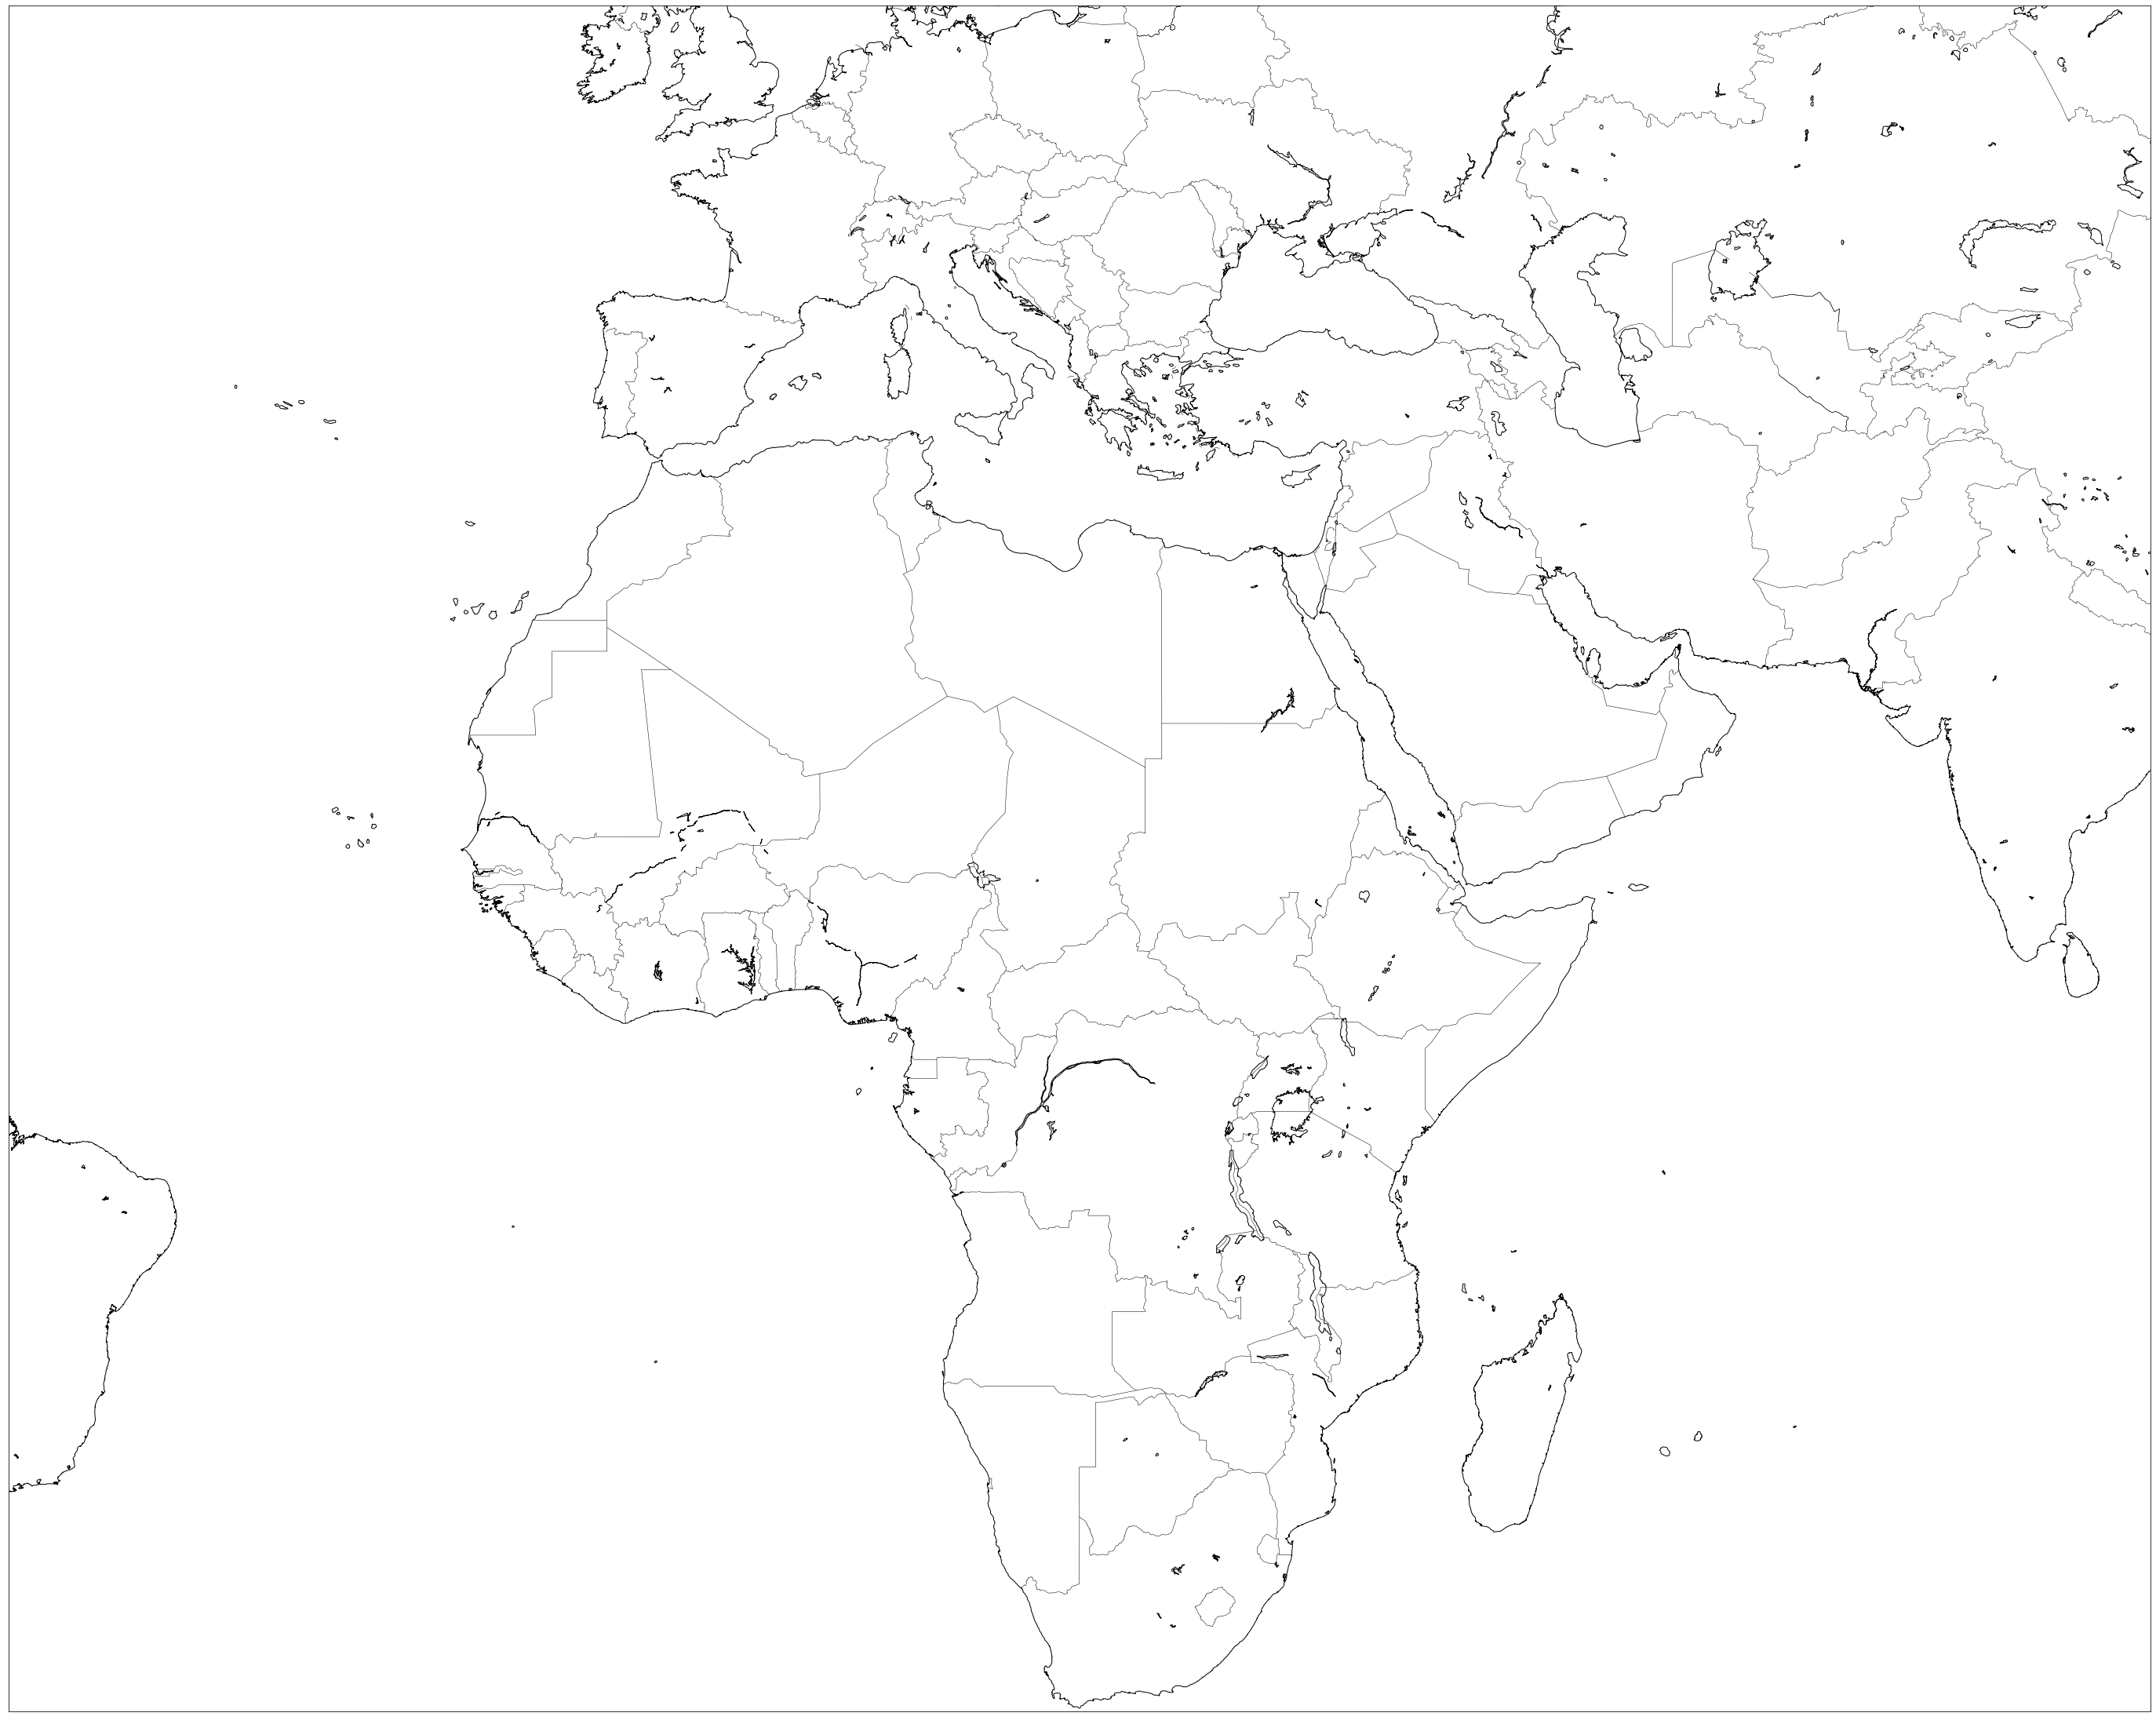

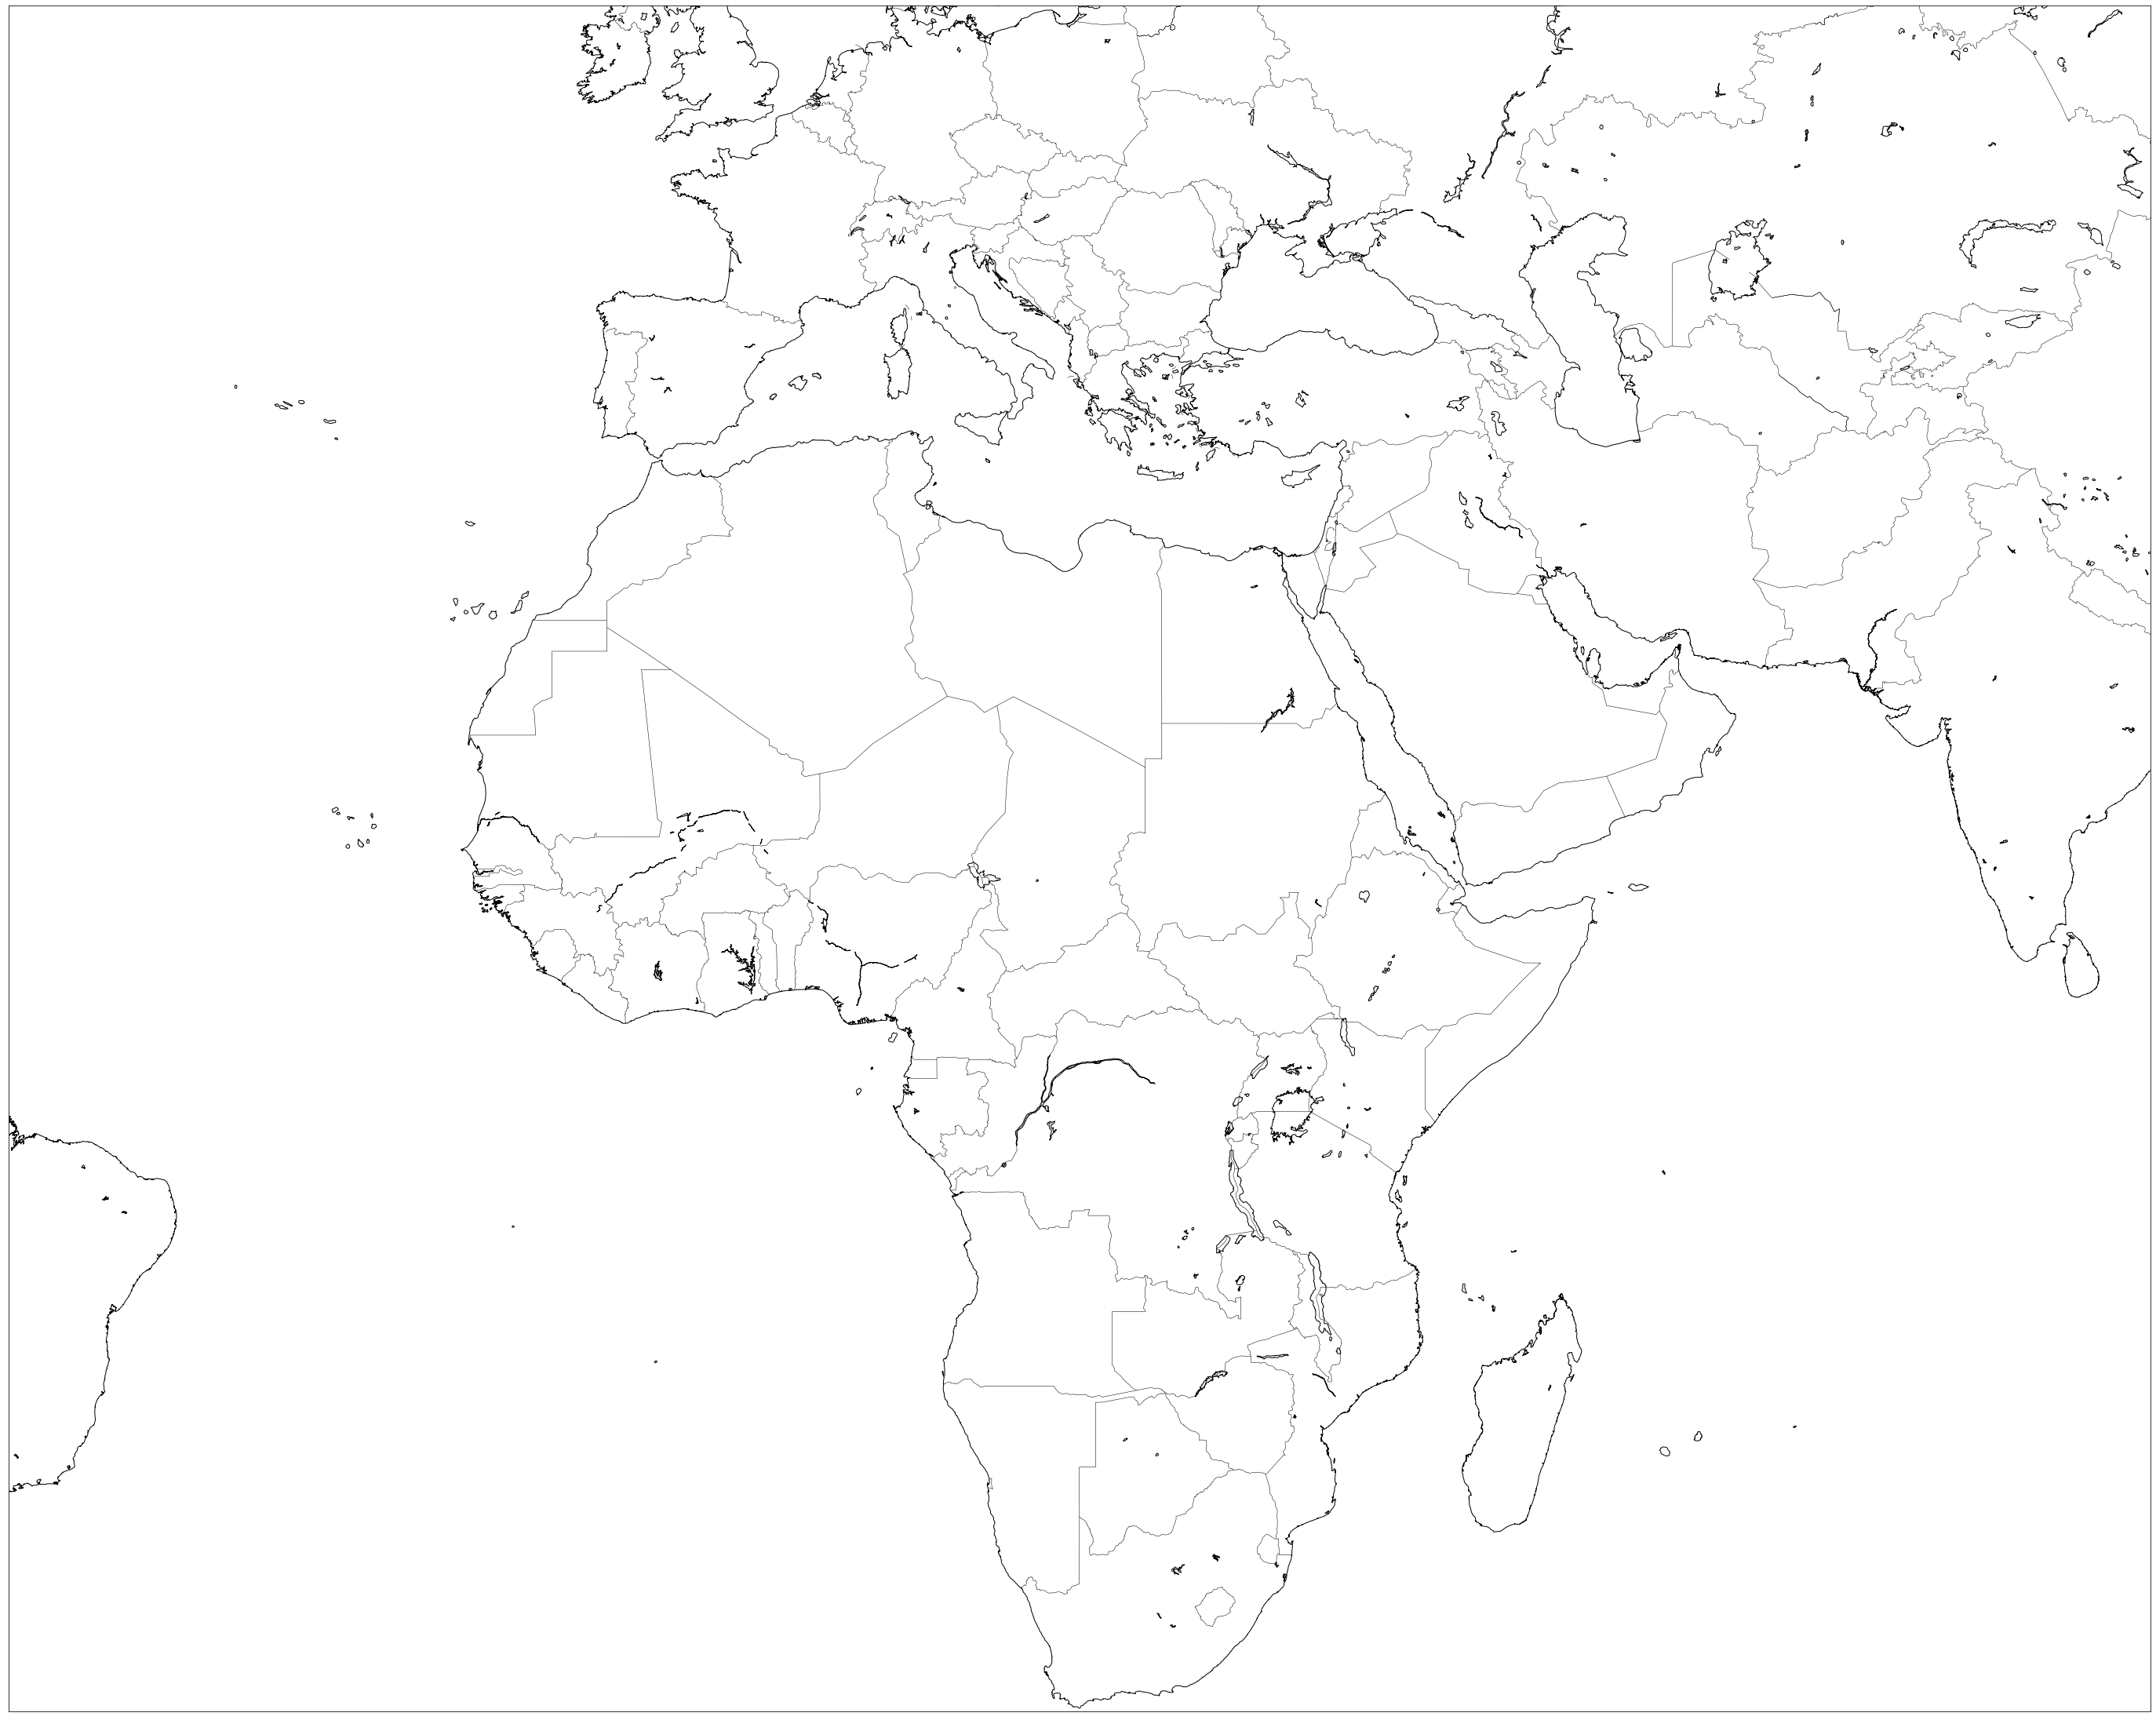

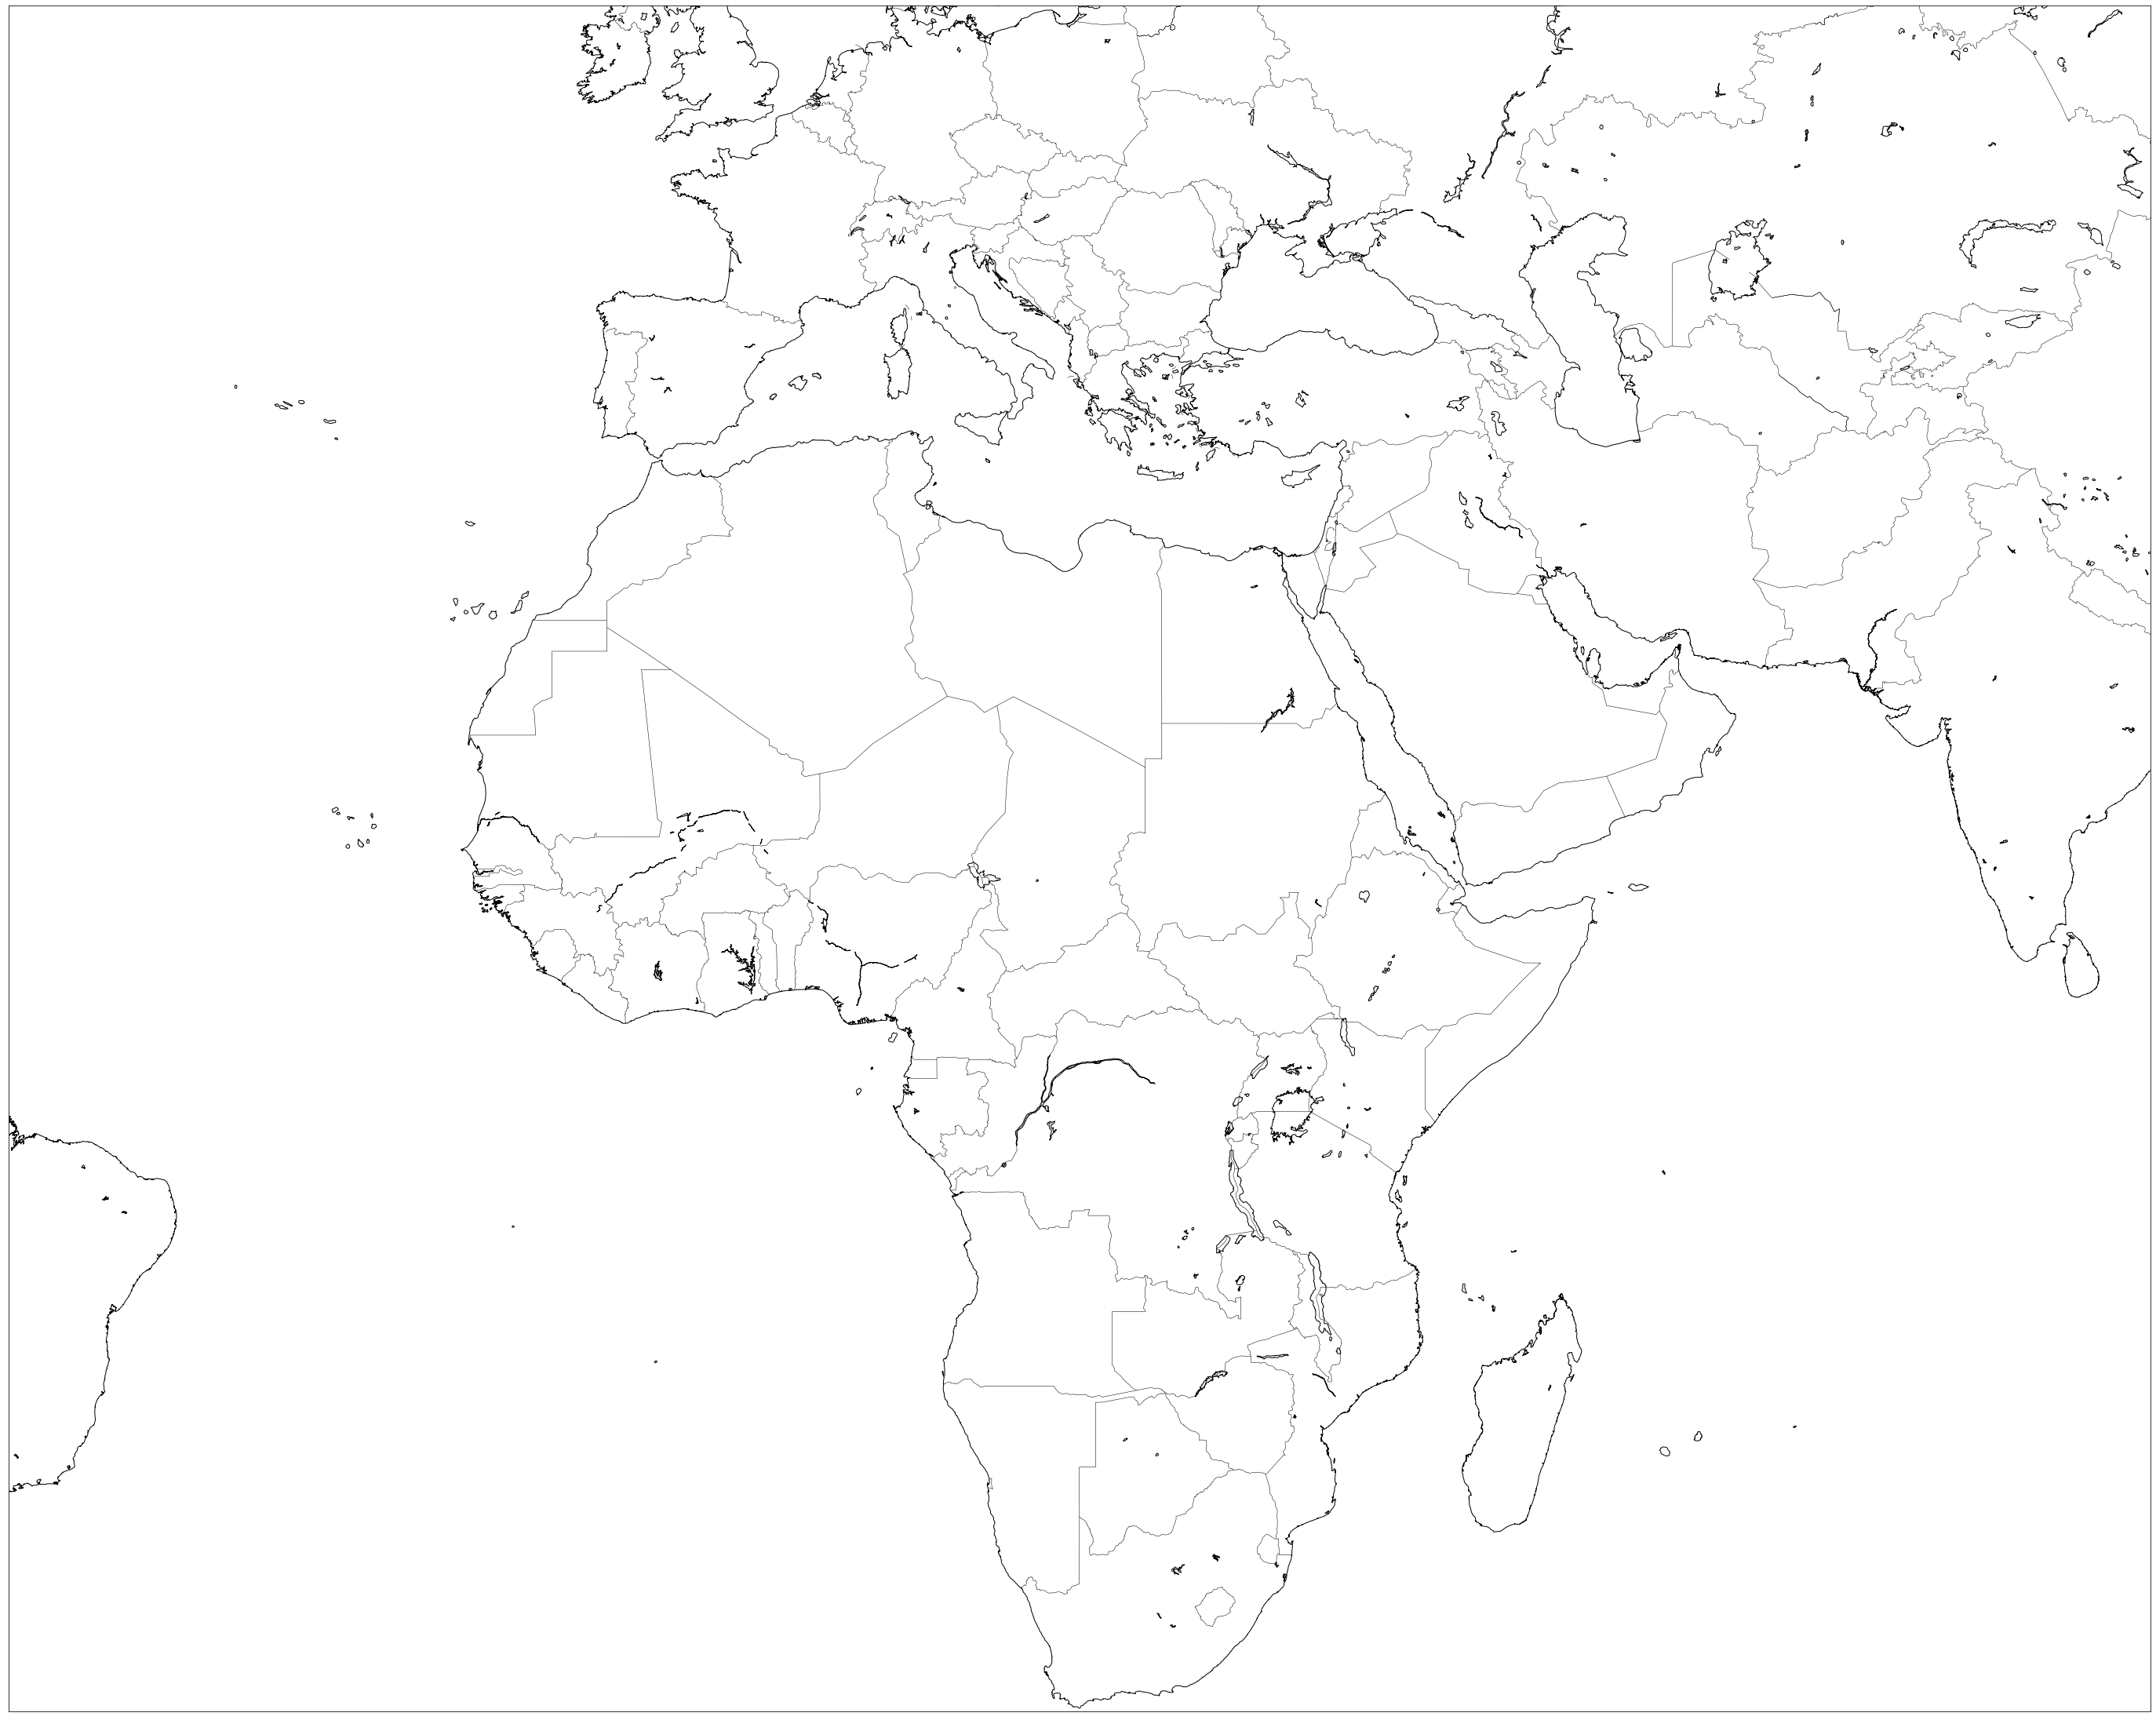

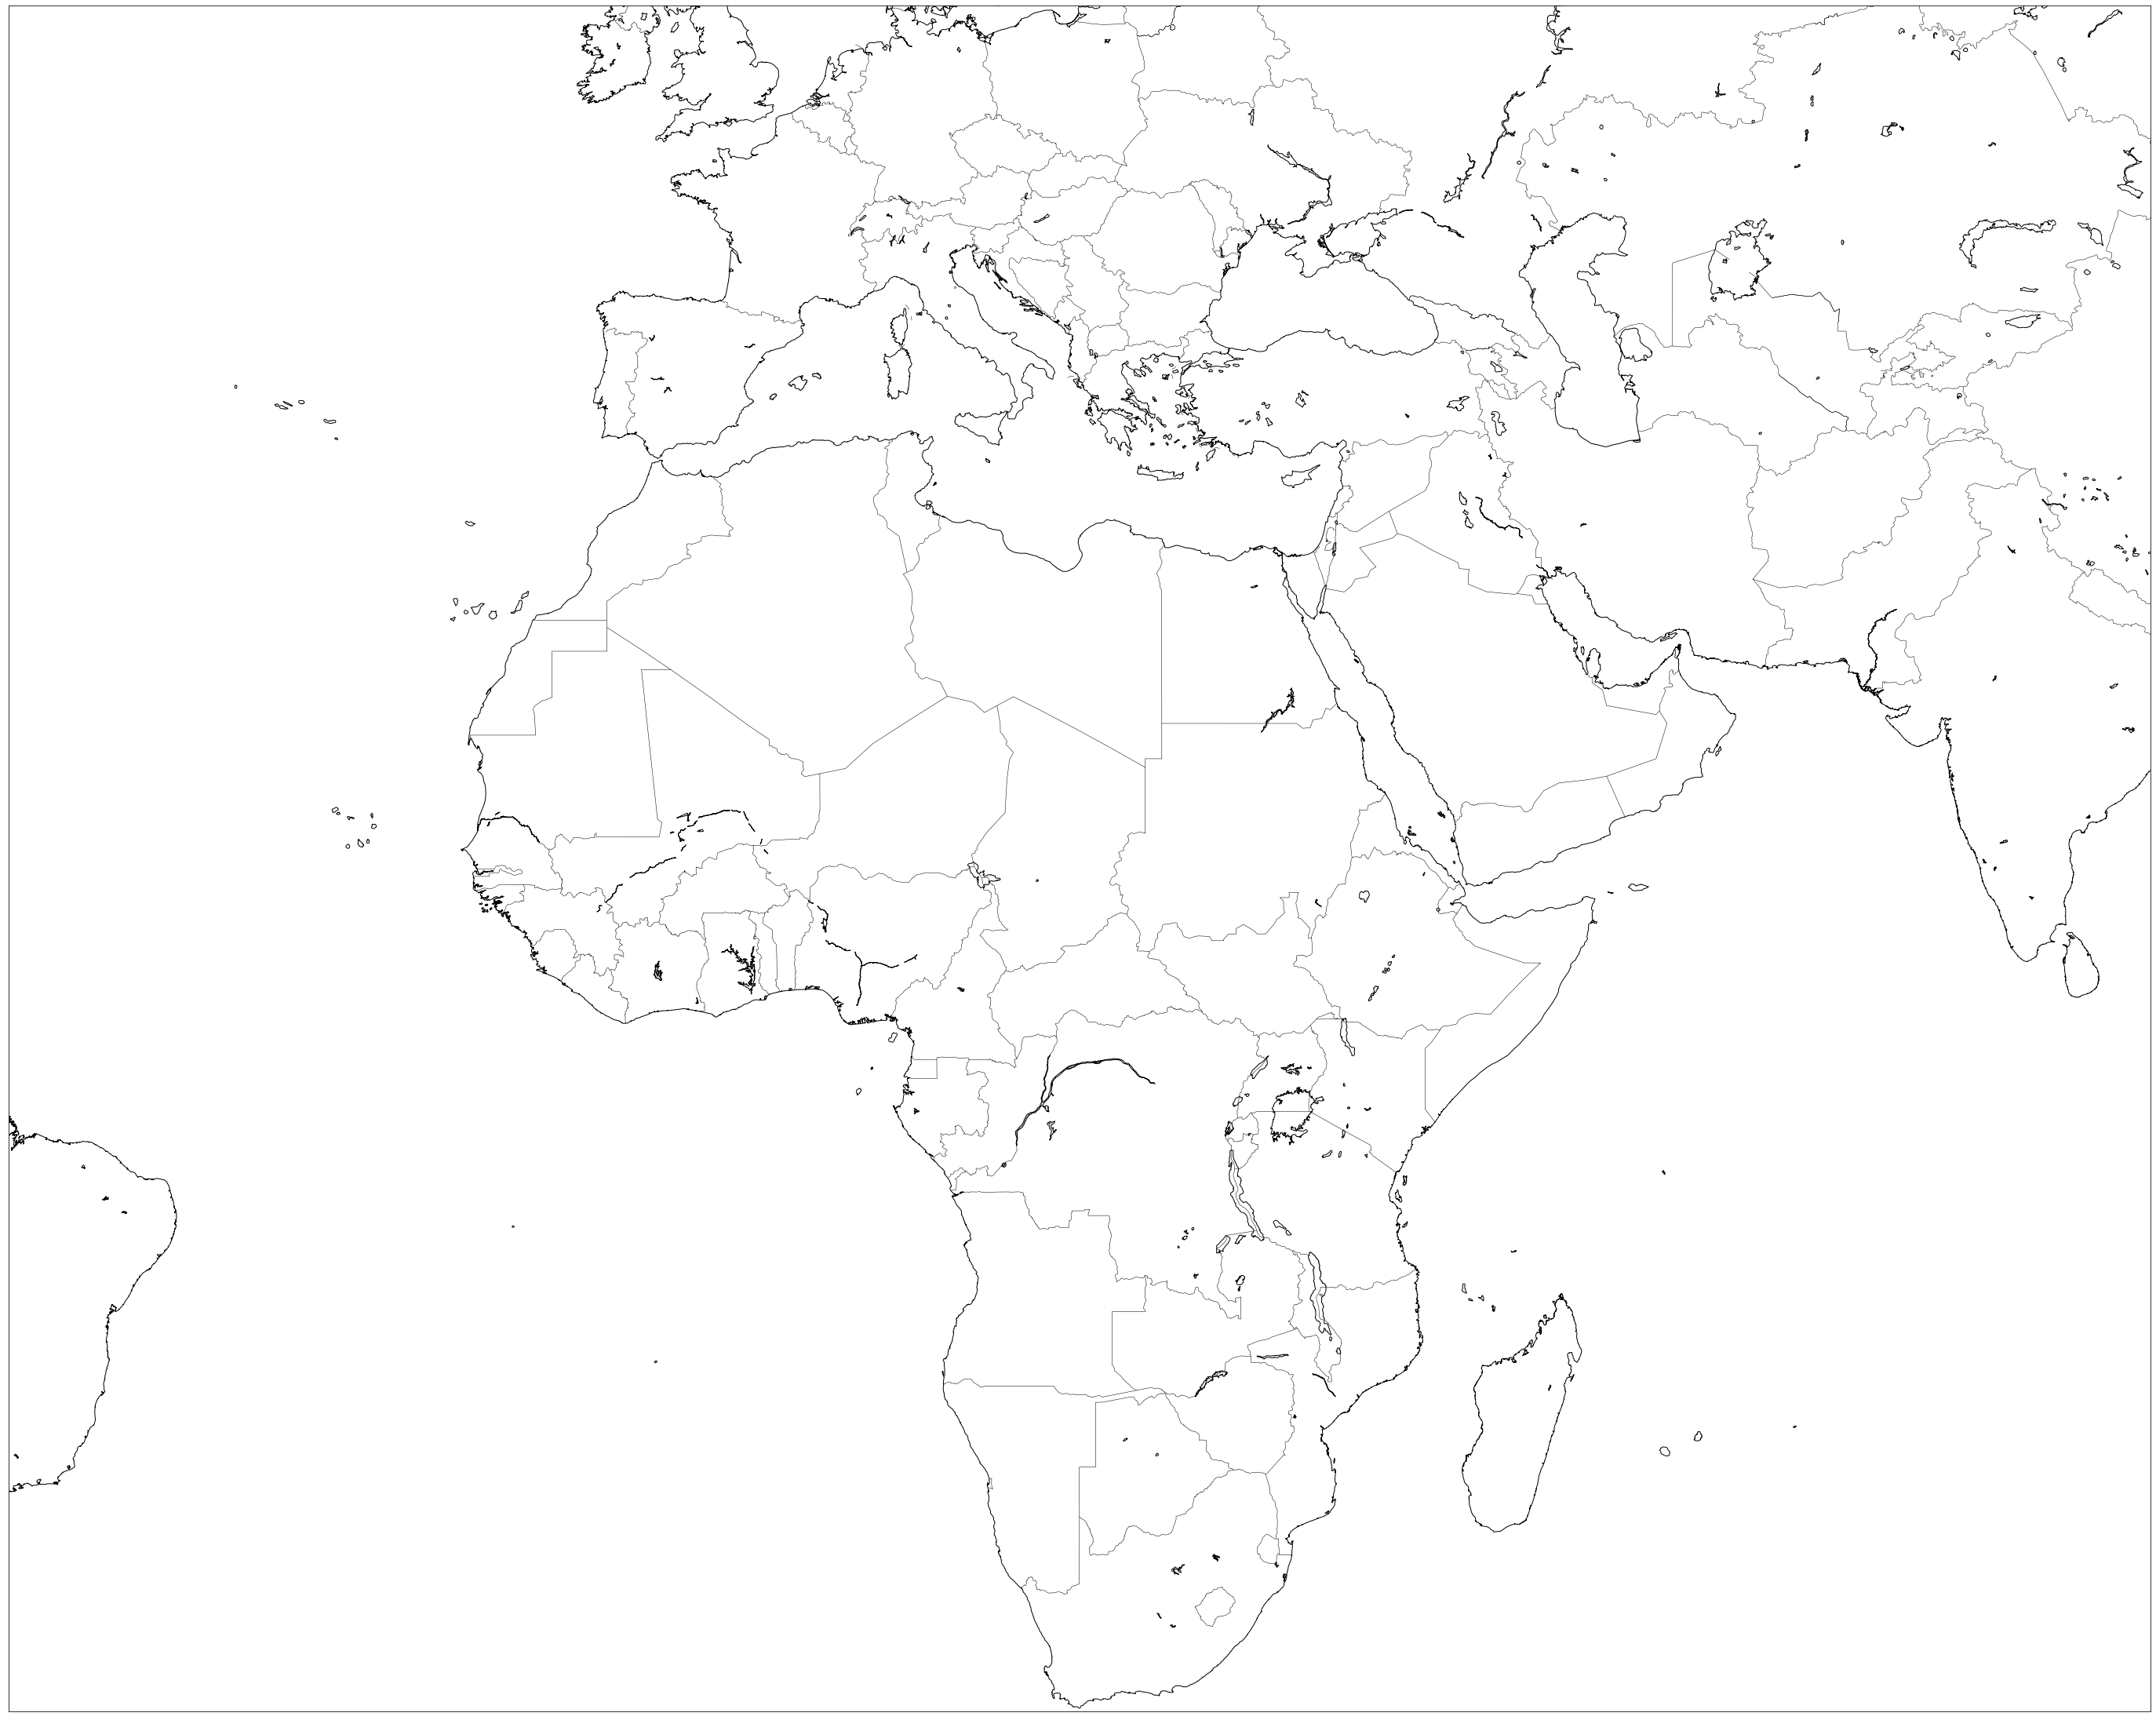

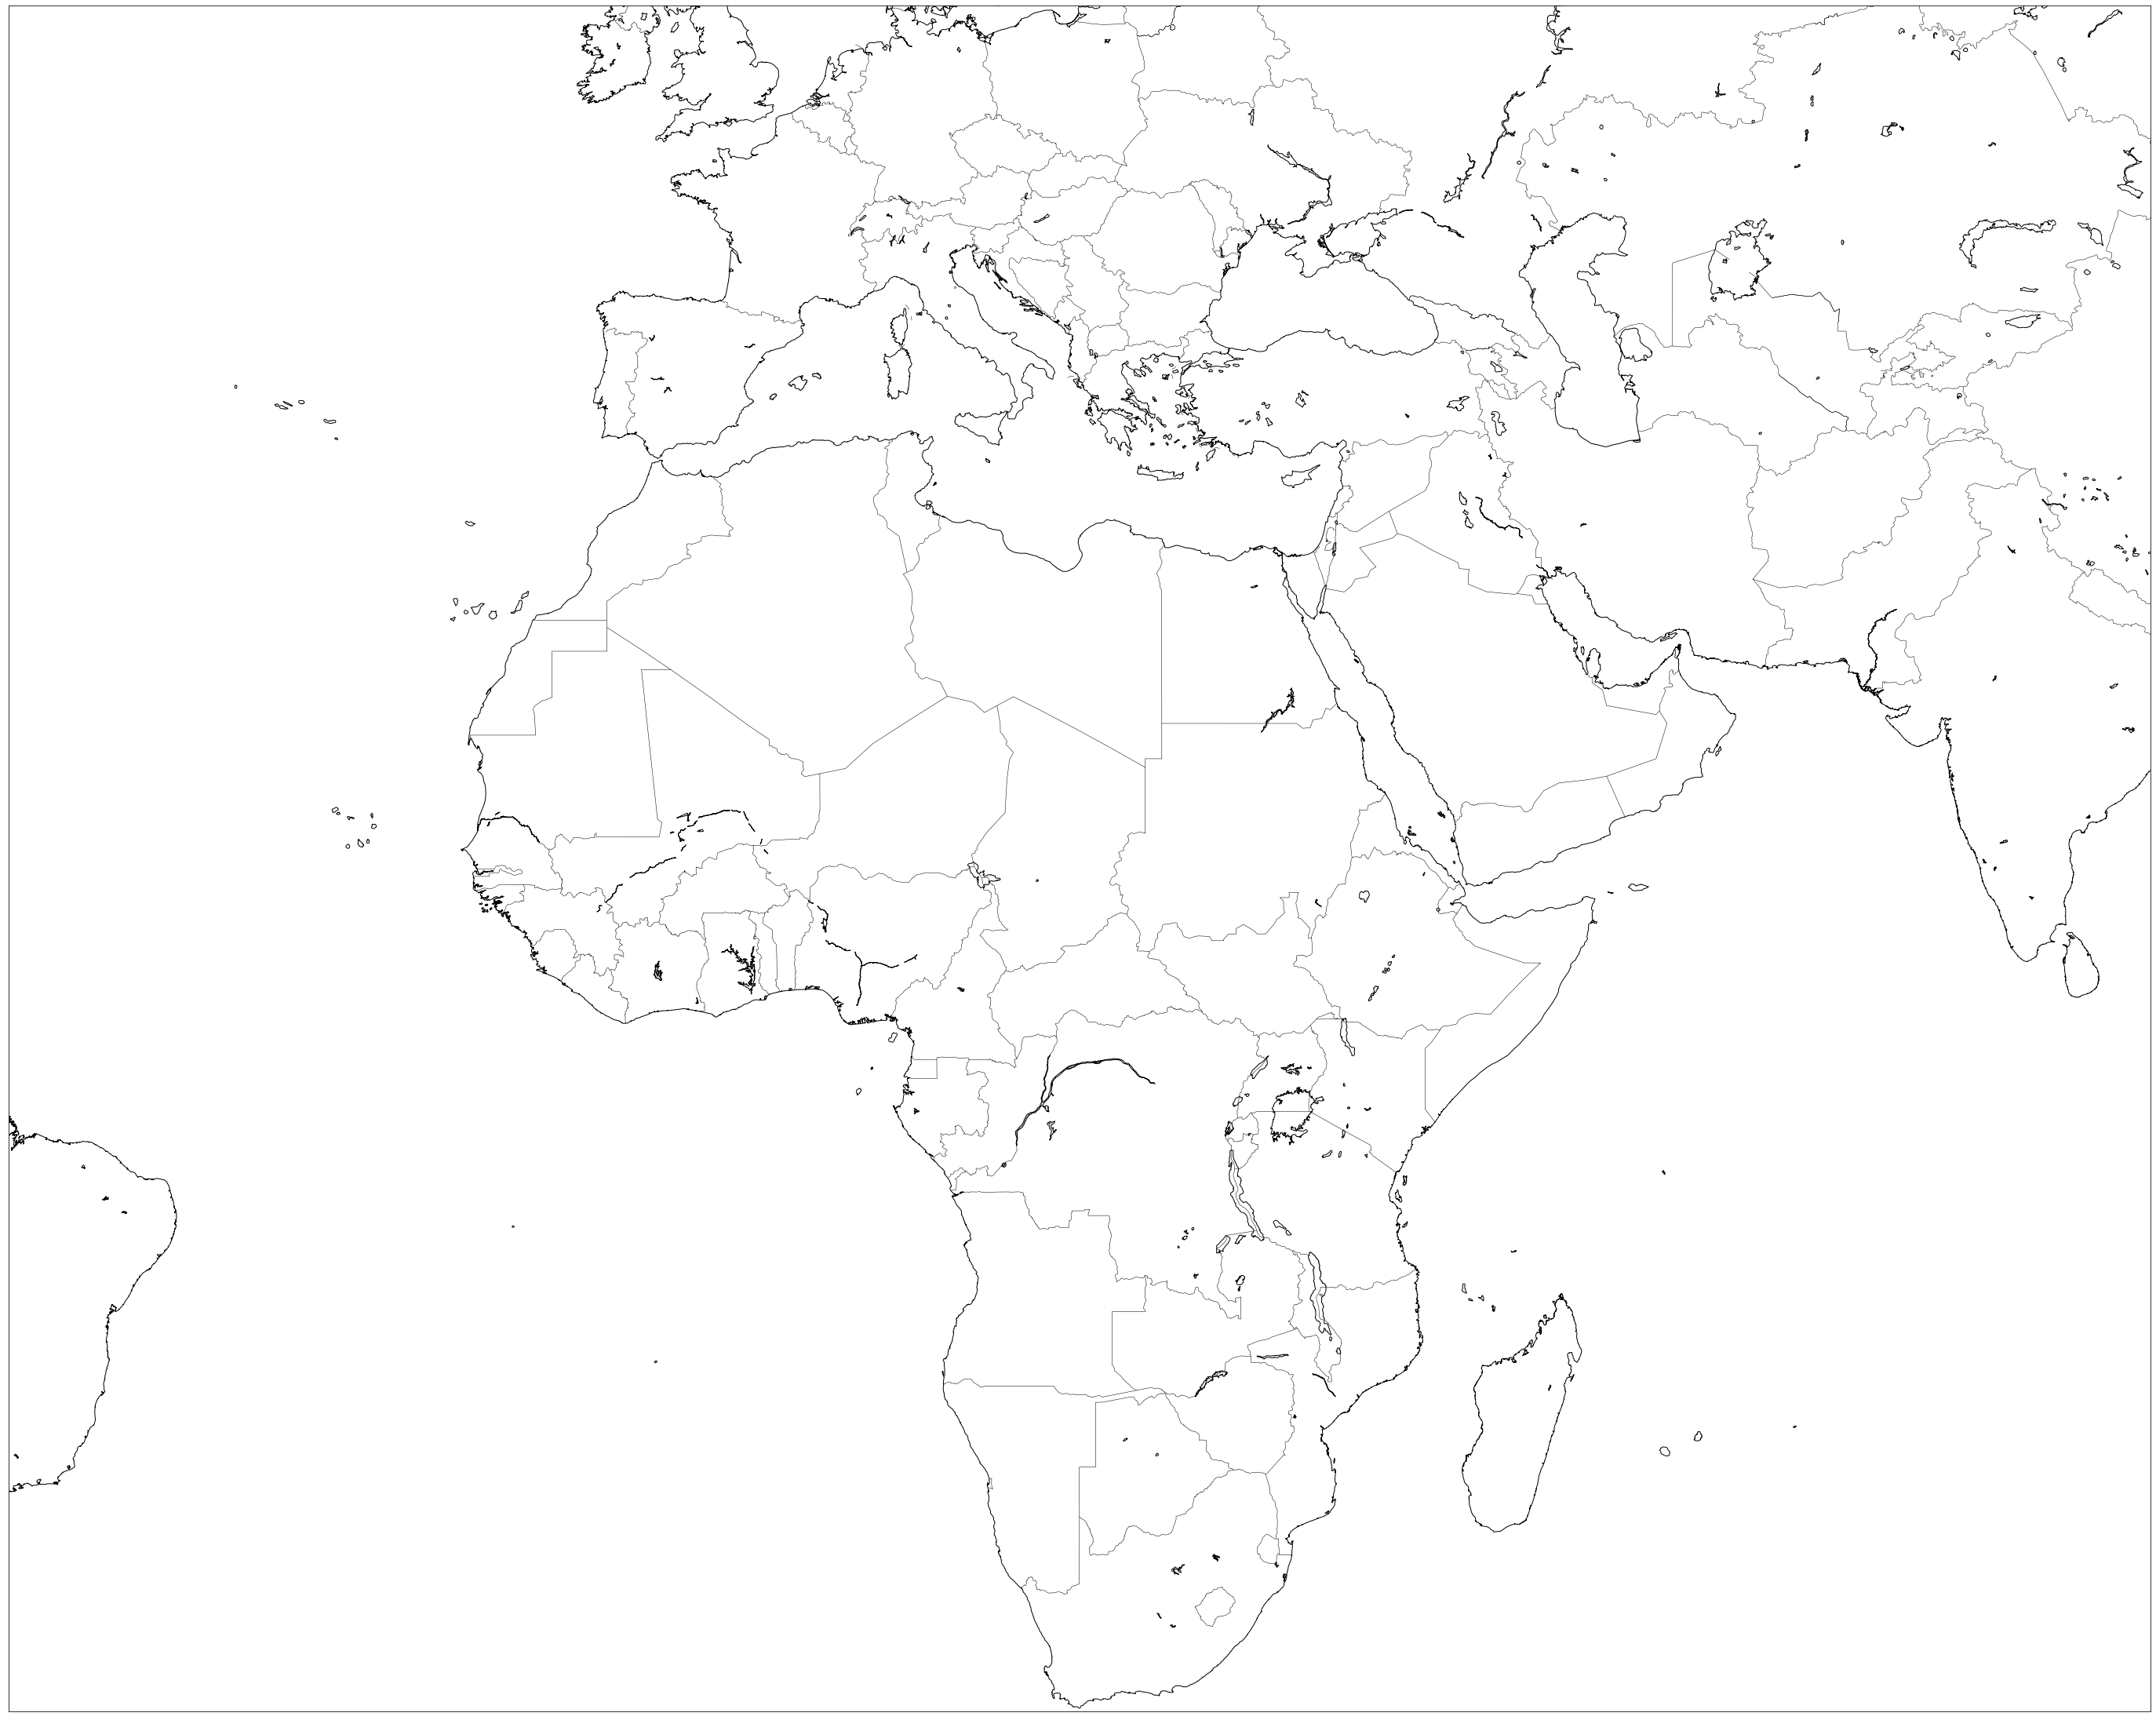

Error in callback <function flush_figures at 0x000002BD02D52670> (for post_execute):


KeyboardInterrupt: 

In [57]:
# Make a map for every day in the data by querying Movebank and Nasa Surface Temperature data and input them into a folder
for link in zipped_datelinks:
    print(link)
    connected = False
    while not connected:
        try:
            make_map_instance(link, first_animal_df)
            connected = True
        except Exception as E:
            print(E)
            pass

('2014-05-12', 'https://neo.gsfc.nasa.gov/servlet/RenderData?si=1766213&amp;cs=rgb&amp;format=SS.CSV&amp;width=360&amp;height=180')


IndexError: index 0 is out of bounds for axis 0 with size 0

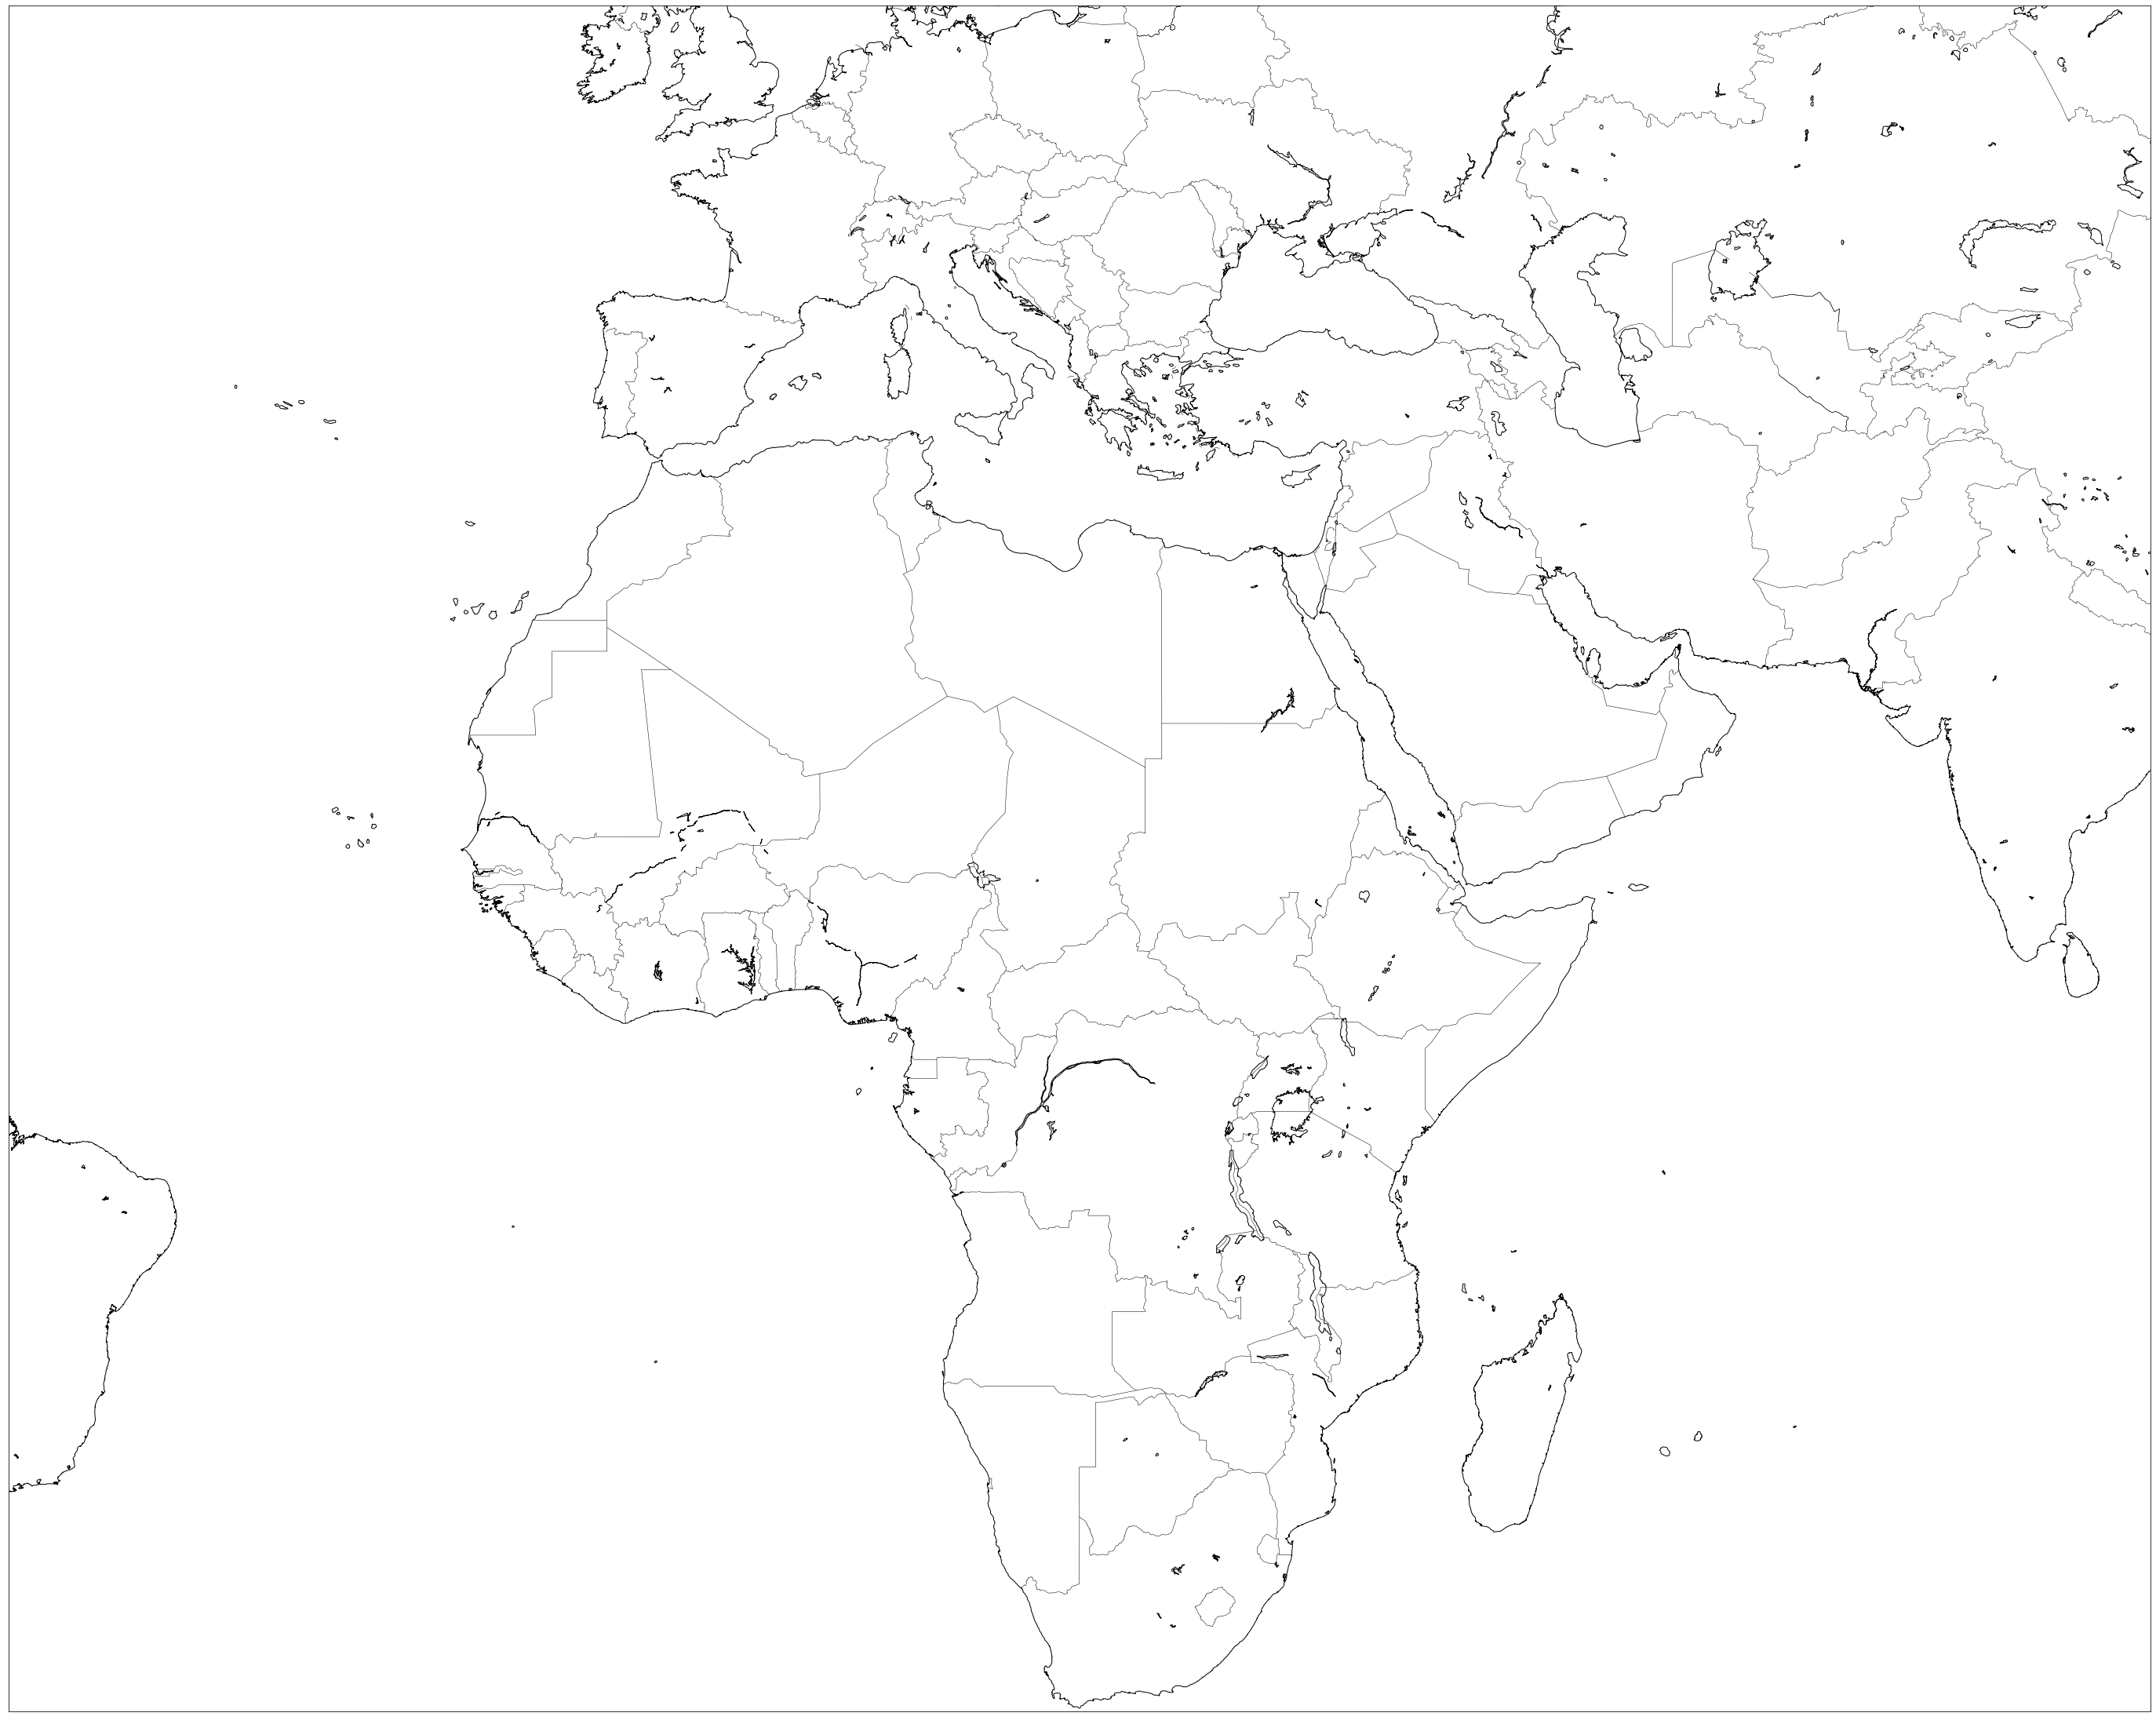

In [61]:
for link in zipped_datelinks:
    print(link)
    make_map_instance(link, first_animal_df)
    connected = True